In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats.mstats import mquantiles
import scipy.stats as ss
import math
import scipy.linalg
import itertools
import copy
import random
import gzip
import rcca_modified as rcca
#reload(rcca)

from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, roc_curve
from sklearn import preprocessing
from scipy.spatial.distance import pdist, squareform
from unils_cca import BuildMatrixA, printMatrix, print_q_val_hist, zscore, plot_zscore, BuildFeatureVector,\
train_test_2D, build_distance_for_node,  get_features, BuildMatrix_w_ambig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
InteractionsFileCaptureC='/srv/scratch/mtaranov/CaptureC_ChicagoCalls/CaptureC_SC_bait-bait.bed.gz'
#InteractionsFileCaptureC='/mnt/lab_data/kundaje/mtaranov/ChicagoCalls/D0_D2D8_merge_BaitToBait_intra.bed.gz'
PromoterFile='/srv/scratch/mtaranov/HindIII/PromoterCapture_Digest_Human_HindIII_baits_ID.bed'
DATADIR='/users/mtaranov/CCA_model/data/'
DATADIR_CaptureC = DATADIR+'CaptureC/'
DATADIR_kernels = DATADIR+'CaptureC_kernels/'
DATADIR_nodes = DATADIR+'nodes/'
DATADIR_features = DATADIR+'features/'
features_dir='/srv/scratch/mtaranov/peaks_at_promoters/output_thres5_max/'
atac=features_dir+'atac'
#TFs
ctcf=features_dir+'CTCF'
pol3=features_dir+'PolII'
TP63=features_dir+'TP63'
LSD1=features_dir+'LSD1'
#histone

H3K27ac=features_dir+'H3K27ac'
H3K27me3=features_dir+'H3K27me3'
H3K4me1=features_dir+'H3K4me1'
H3K4me3=features_dir+'H3K4me3'
H3K9ac=features_dir+'H3K9ac'

## Get kernels for each chr and split it into train/test

In [3]:
all_chrs = ['chr'+str(i+1) for i in range(22)]+['chrX']

chr1
Training set: 1590
Test set: 682
Train by train: (1590, 1590) Test by test: (682, 682) All by all: (2272, 2272)
kernel-CaptueC:  (1590, 1590) (682, 682)
46.6549268544
(2272, 2272)
Limit: 46.6549268544


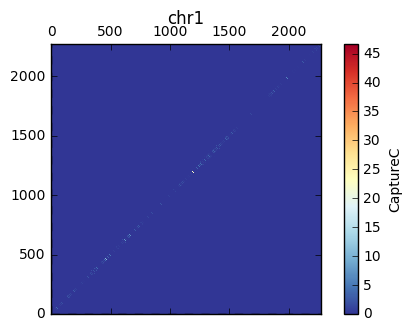

nan
(2272, 2272)
Limit: nan


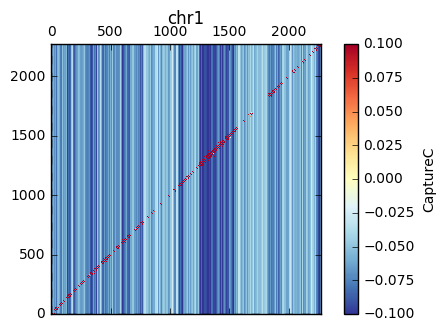

47.6550102298
(2272, 2272)
Limit: 47.6550102298


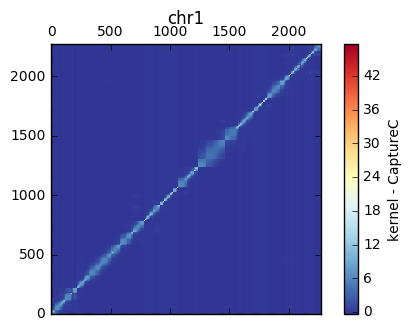

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.013635616418
Average q-value w/o zeros:  1.58521764289


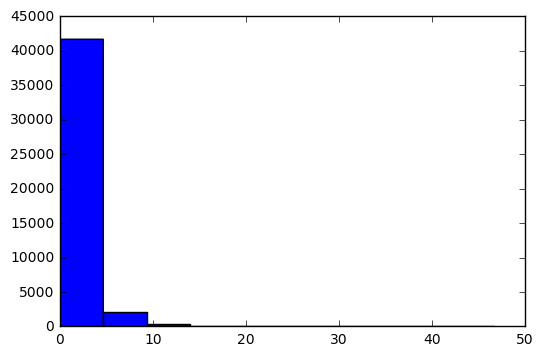

chr2
Training set: 1122
Test set: 482
Train by train: (1122, 1122) Test by test: (482, 482) All by all: (1604, 1604)
kernel-CaptueC:  (1122, 1122) (482, 482)
52.2524743922
(1604, 1604)
Limit: 52.2524743922


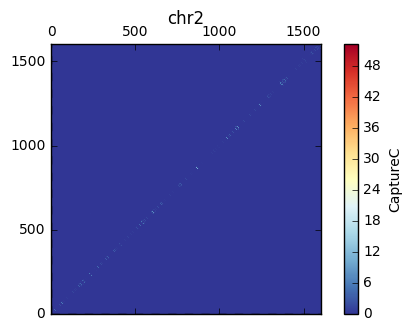

nan
(1604, 1604)
Limit: nan


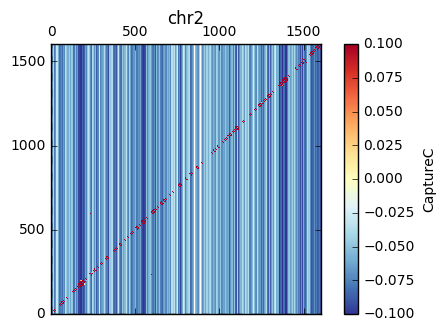

40.0374824383
(1604, 1604)
Limit: 40.0374824383


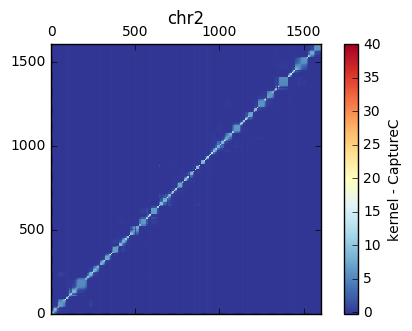

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0140037066608
Average q-value w/o zeros:  1.63619257749


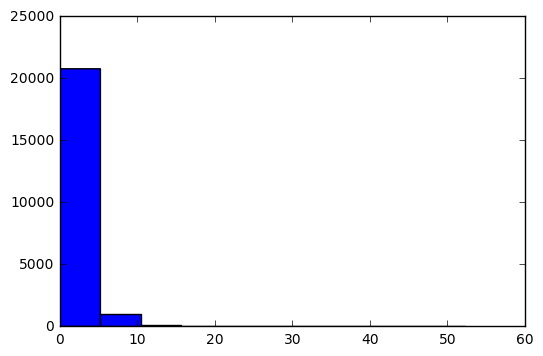

chr3
Training set: 931
Test set: 400
Train by train: (931, 931) Test by test: (400, 400) All by all: (1331, 1331)
kernel-CaptueC:  (931, 931) (400, 400)
51.8823719279
(1331, 1331)
Limit: 51.8823719279


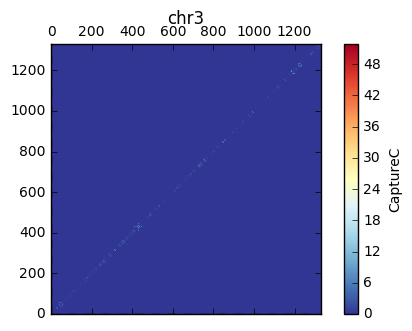

nan
(1331, 1331)
Limit: nan


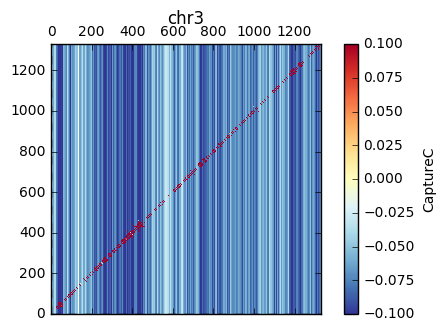

36.4691650576
(1331, 1331)
Limit: 36.4691650576


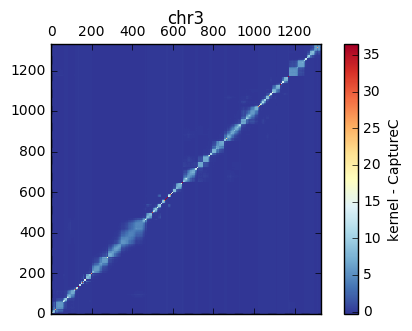

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0162702973766
Average q-value w/o zeros:  1.56549121718


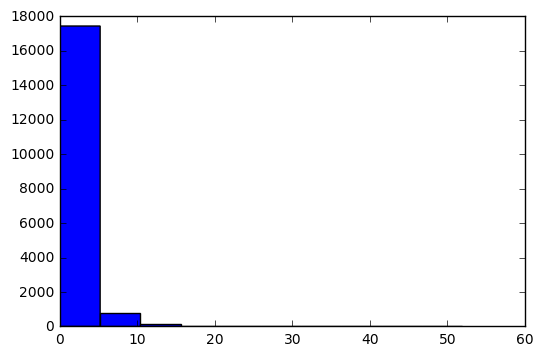

chr4
Training set: 662
Test set: 285
Train by train: (662, 662) Test by test: (285, 285) All by all: (947, 947)
kernel-CaptueC:  (662, 662) (285, 285)
29.1857337384
(947, 947)
Limit: 29.1857337384


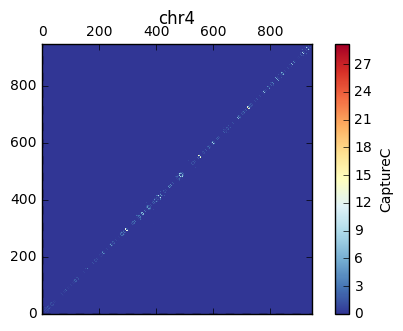

nan
(947, 947)
Limit: nan


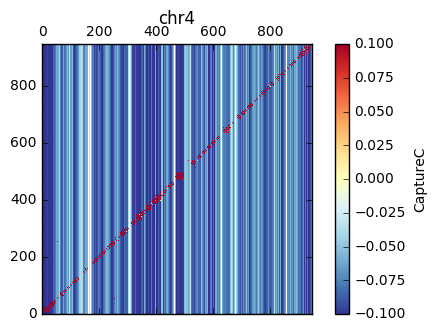

30.7571129985
(947, 947)
Limit: 30.7571129985


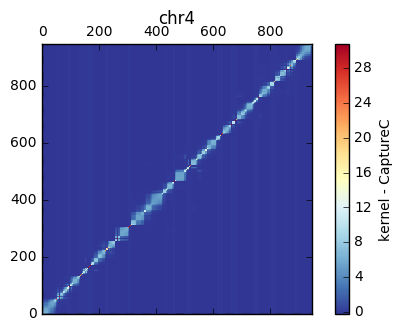

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0163291883248
Average q-value w/o zeros:  1.46852818415


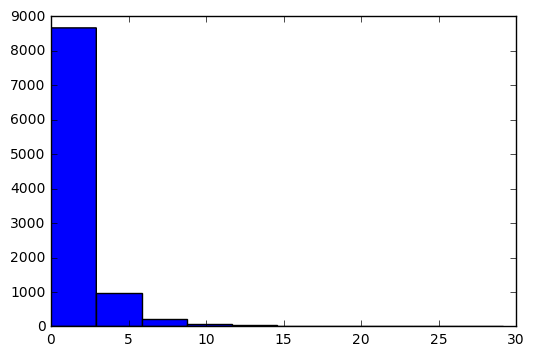

chr5
Training set: 781
Test set: 336
Train by train: (781, 781) Test by test: (336, 336) All by all: (1117, 1117)
kernel-CaptueC:  (781, 781) (336, 336)
42.7960448953
(1117, 1117)
Limit: 42.7960448953


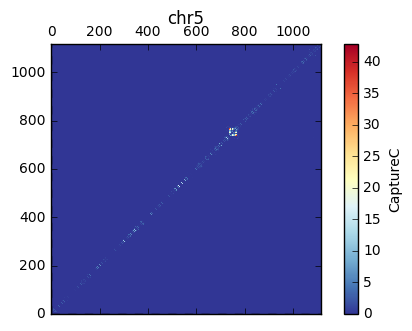

nan
(1117, 1117)
Limit: nan


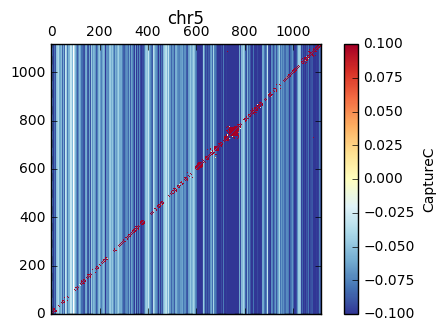

33.406586177
(1117, 1117)
Limit: 33.406586177


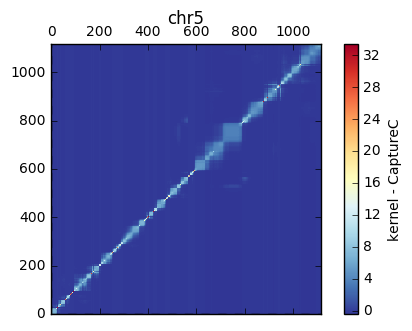

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0261547132851
Average q-value w/o zeros:  2.10752699974


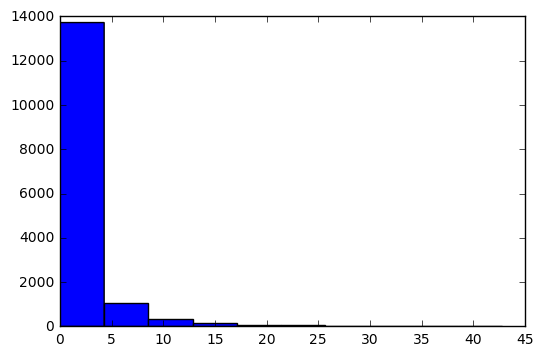

chr6
Training set: 856
Test set: 368
Train by train: (856, 856) Test by test: (368, 368) All by all: (1224, 1224)
kernel-CaptueC:  (856, 856) (368, 368)
36.0192673345
(1224, 1224)
Limit: 36.0192673345


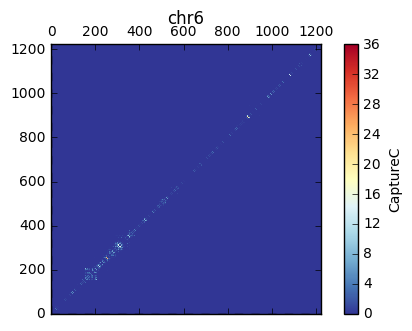

nan
(1224, 1224)
Limit: nan


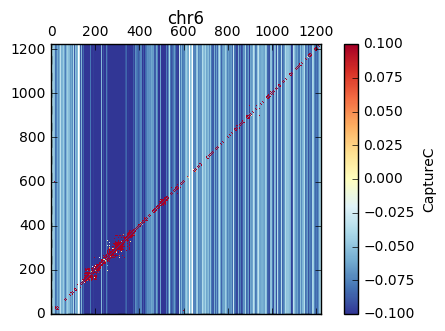

34.9714169001
(1224, 1224)
Limit: 34.9714169001


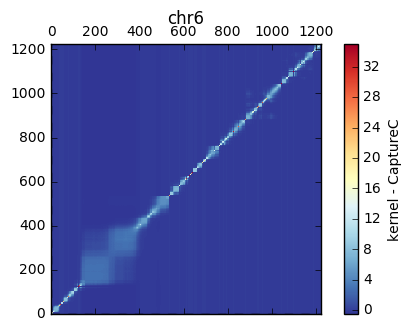

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0226064729999
Average q-value w/o zeros:  1.6915630453


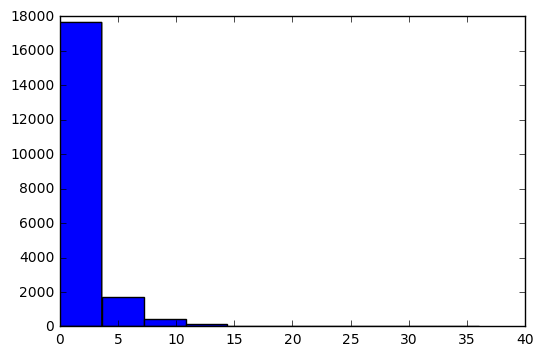

chr7
Training set: 714
Test set: 306
Train by train: (714, 714) Test by test: (306, 306) All by all: (1020, 1020)
kernel-CaptueC:  (714, 714) (306, 306)
25.5283886209
(1020, 1020)
Limit: 25.5283886209


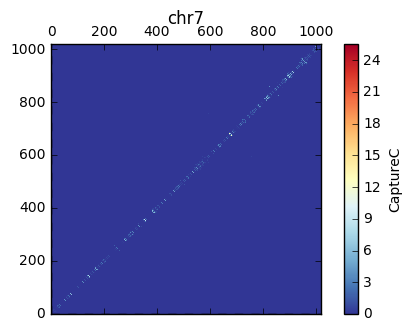

nan
(1020, 1020)
Limit: nan


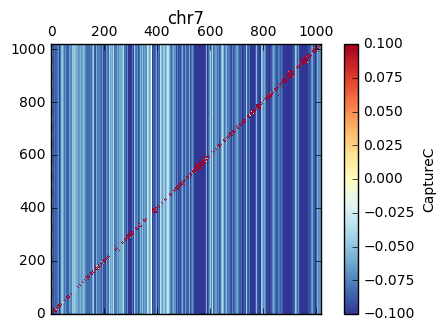

31.921779399
(1020, 1020)
Limit: 31.921779399


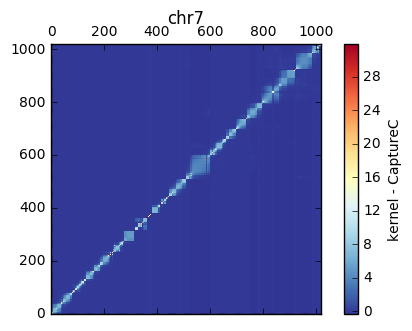

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0183764320091
Average q-value w/o zeros:  1.52877337776


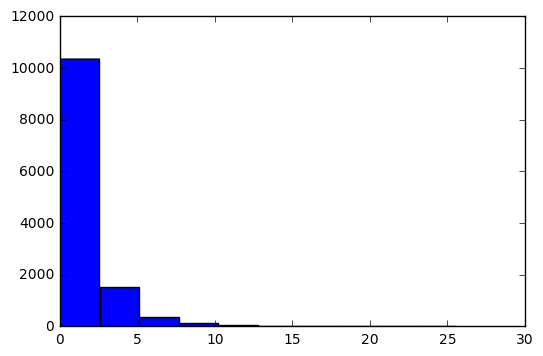

chr8
Training set: 627
Test set: 270
Train by train: (627, 627) Test by test: (270, 270) All by all: (897, 897)
kernel-CaptueC:  (627, 627) (270, 270)
25.6318863979
(897, 897)
Limit: 25.6318863979


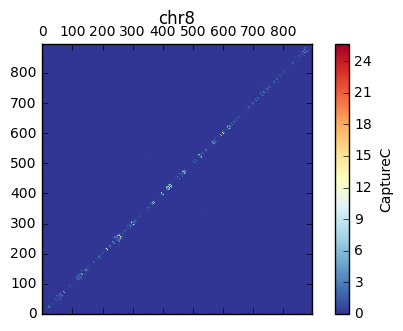

nan
(897, 897)
Limit: nan


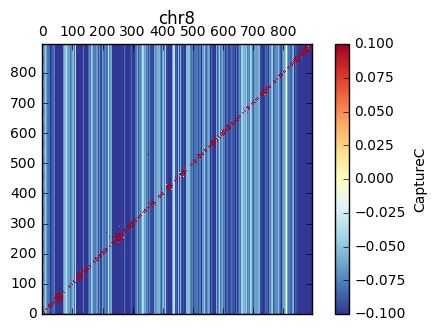

29.9332590942
(897, 897)
Limit: 29.9332590942


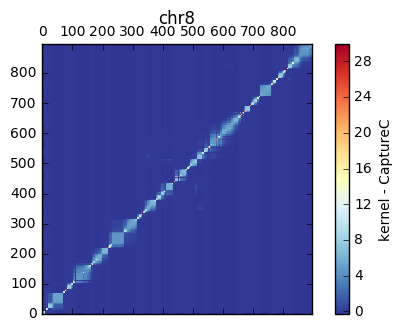

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0201113853103
Average q-value w/o zeros:  1.50640491744


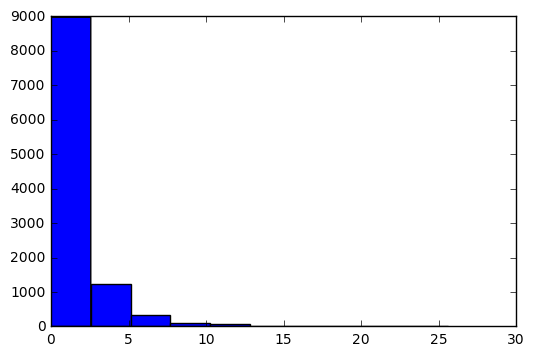

chr9
Training set: 601
Test set: 258
Train by train: (601, 601) Test by test: (258, 258) All by all: (859, 859)
kernel-CaptueC:  (601, 601) (258, 258)
27.5909812515
(859, 859)
Limit: 27.5909812515


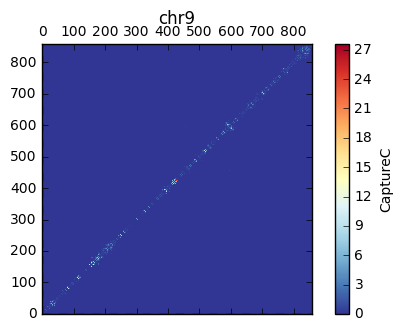

nan
(859, 859)
Limit: nan


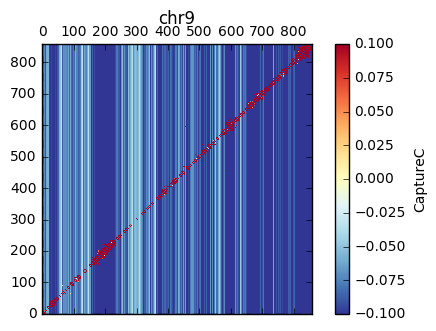

29.2916370318
(859, 859)
Limit: 29.2916370318


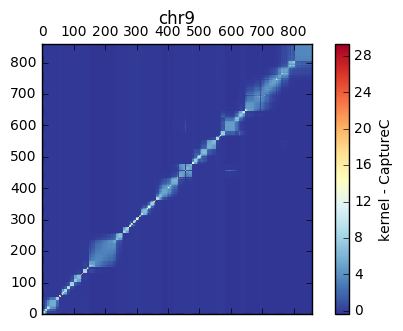

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0223130753347
Average q-value w/o zeros:  1.24297103586


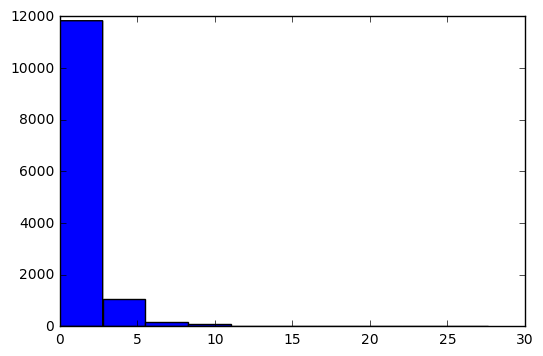

chr10
Training set: 660
Test set: 283
Train by train: (660, 660) Test by test: (283, 283) All by all: (943, 943)
kernel-CaptueC:  (660, 660) (283, 283)
29.8887646521
(943, 943)
Limit: 29.8887646521


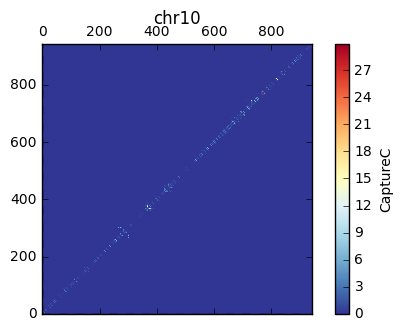

nan
(943, 943)
Limit: nan


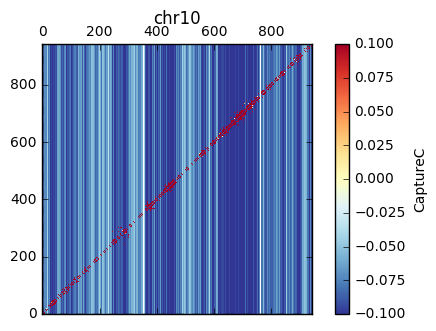

30.6920185064
(943, 943)
Limit: 30.6920185064


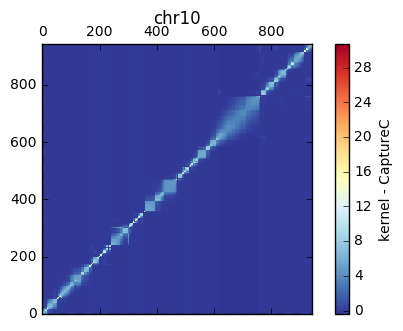

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0194295485001
Average q-value w/o zeros:  1.38977691233


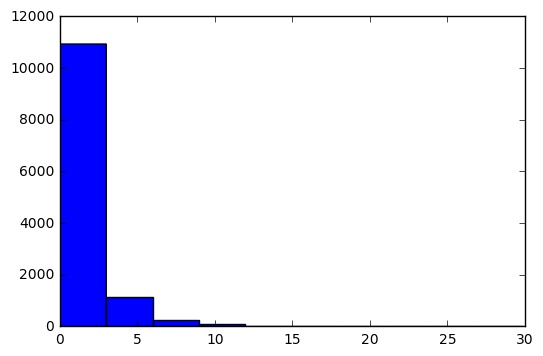

chr11
Training set: 980
Test set: 421
Train by train: (980, 980) Test by test: (421, 421) All by all: (1401, 1401)
kernel-CaptueC:  (980, 980) (421, 421)
89.248892498
(1401, 1401)
Limit: 89.248892498


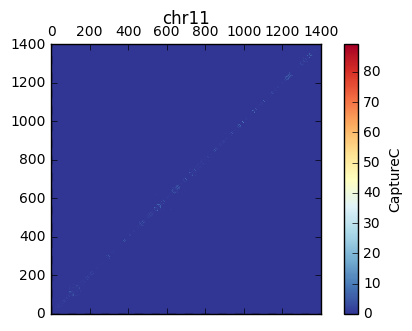

nan
(1401, 1401)
Limit: nan


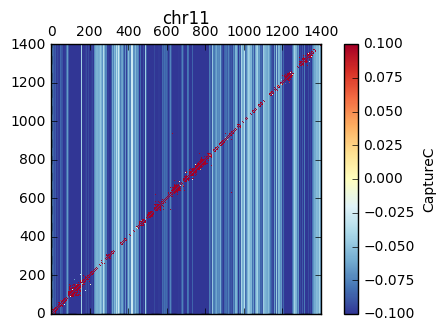

37.4165738677
(1401, 1401)
Limit: 37.4165738677


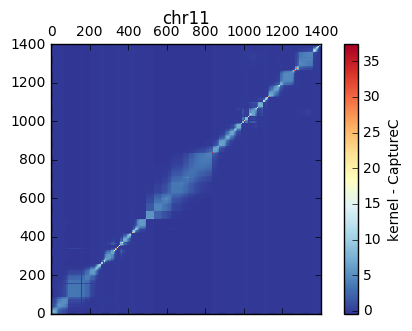

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0219813308119
Average q-value w/o zeros:  1.37081330936


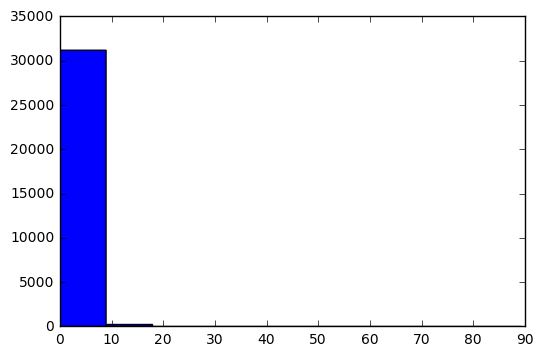

chr12
Training set: 840
Test set: 360
Train by train: (840, 840) Test by test: (360, 360) All by all: (1200, 1200)
kernel-CaptueC:  (840, 840) (360, 360)
38.279557815
(1200, 1200)
Limit: 38.279557815


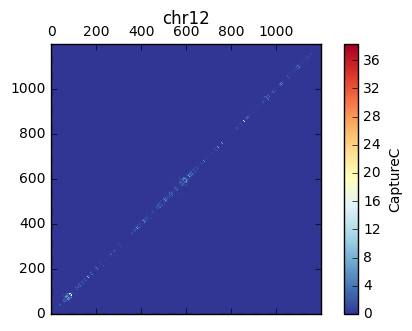

nan
(1200, 1200)
Limit: nan


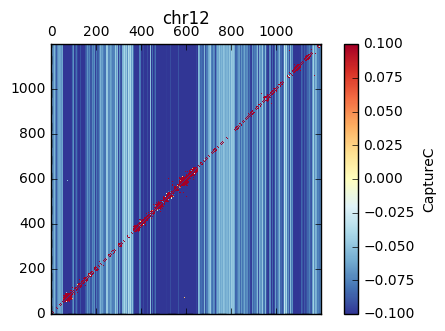

34.6265793864
(1200, 1200)
Limit: 34.6265793864


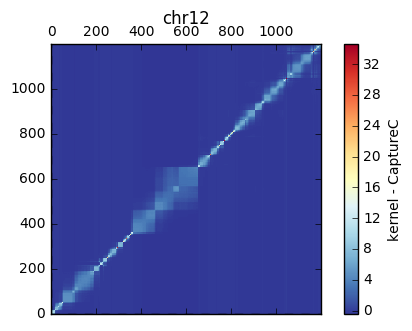

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0244960167711
Average q-value w/o zeros:  1.58692928515


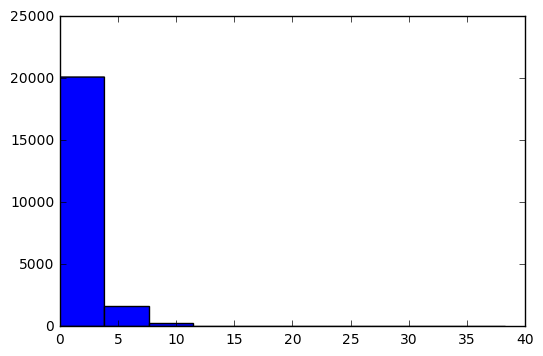

chr13
Training set: 316
Test set: 136
Train by train: (316, 316) Test by test: (136, 136) All by all: (452, 452)
kernel-CaptueC:  (316, 316) (136, 136)
21.5727906396
(452, 452)
Limit: 21.5727906396


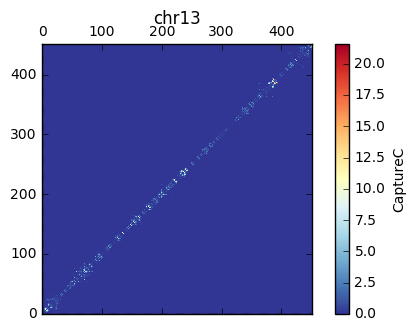

nan
(452, 452)
Limit: nan


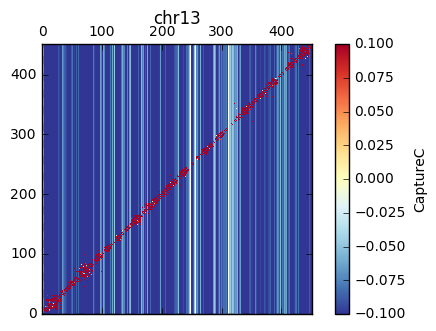

21.2367605816
(452, 452)
Limit: 21.2367605816


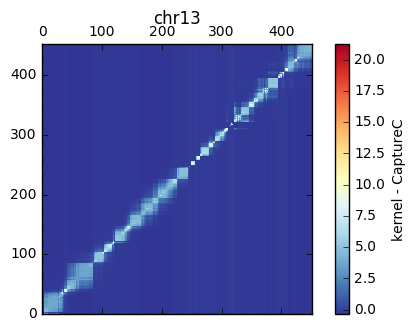

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0279582987838
Average q-value w/o zeros:  1.38775322515


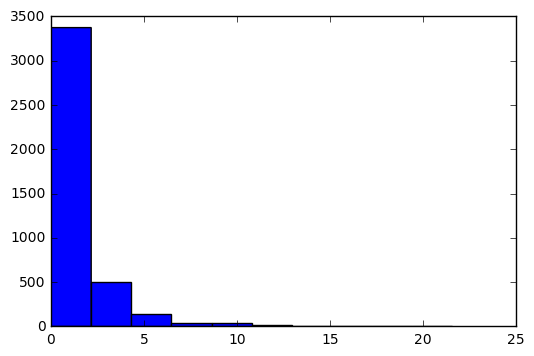

chr14
Training set: 545
Test set: 234
Train by train: (545, 545) Test by test: (234, 234) All by all: (779, 779)
kernel-CaptueC:  (545, 545) (234, 234)
42.0631034651
(779, 779)
Limit: 42.0631034651


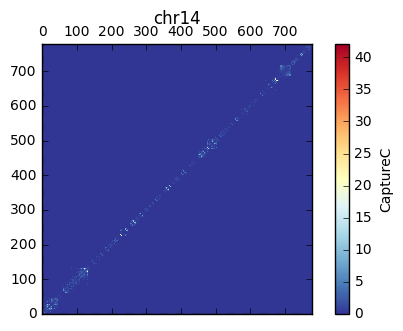

nan
(779, 779)
Limit: nan


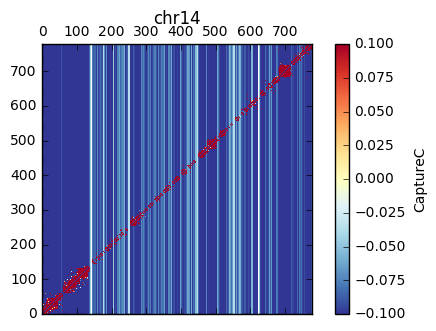

27.892651362
(779, 779)
Limit: 27.892651362


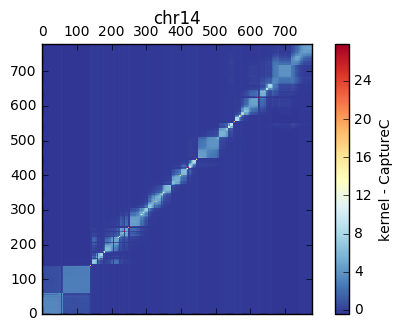

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.03441492286
Average q-value w/o zeros:  1.50247382757


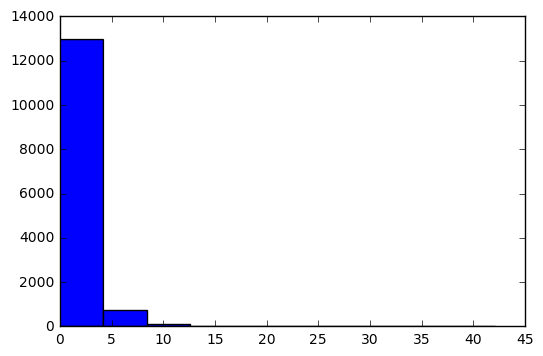

chr15
Training set: 440
Test set: 189
Train by train: (440, 440) Test by test: (189, 189) All by all: (629, 629)
kernel-CaptueC:  (440, 440) (189, 189)
36.7444246202
(629, 629)
Limit: 36.7444246202


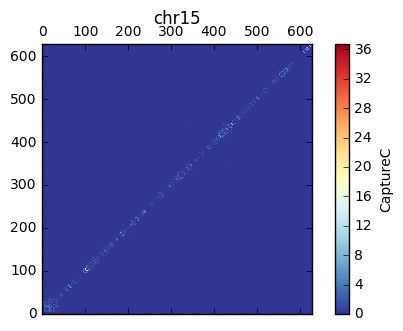

nan
(629, 629)
Limit: nan


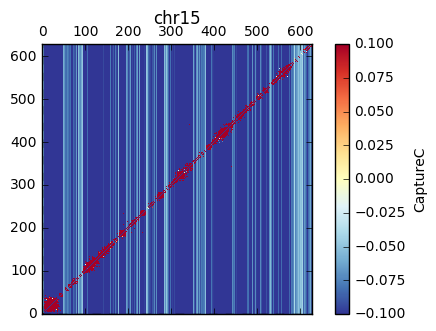

25.0599281723
(629, 629)
Limit: 25.0599281723


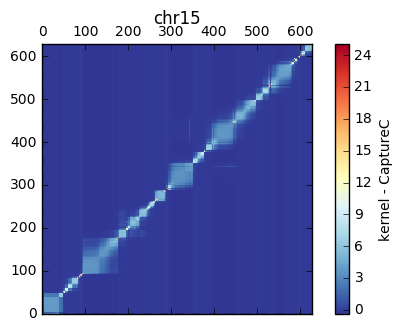

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0290273562292
Average q-value w/o zeros:  1.33198935814


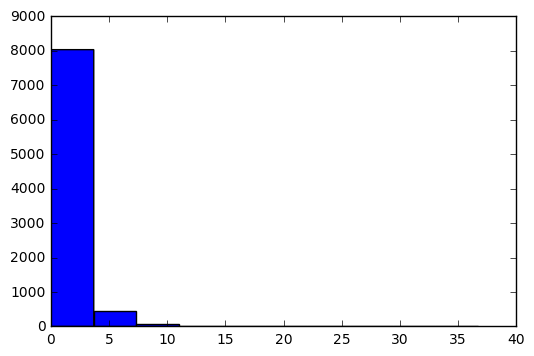

chr16
Training set: 508
Test set: 218
Train by train: (508, 508) Test by test: (218, 218) All by all: (726, 726)
kernel-CaptueC:  (508, 508) (218, 218)
34.411055285
(726, 726)
Limit: 34.411055285


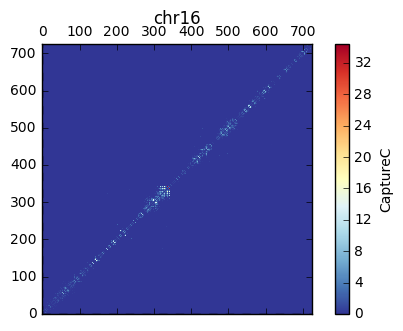

nan
(726, 726)
Limit: nan


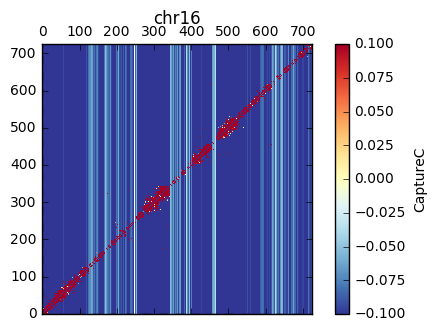

26.9258240357
(726, 726)
Limit: 26.9258240357


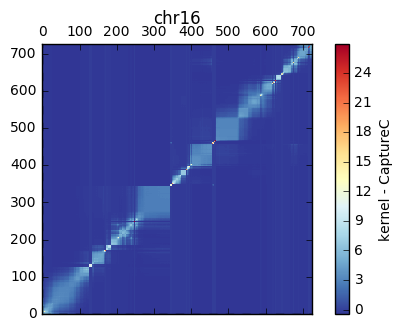

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0380255198269
Average q-value w/o zeros:  1.48154486164


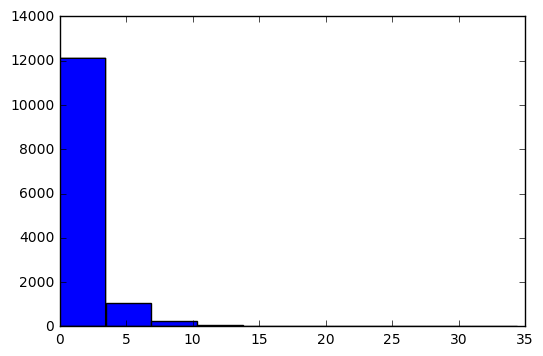

chr17
Training set: 739
Test set: 318
Train by train: (739, 739) Test by test: (318, 318) All by all: (1057, 1057)
kernel-CaptueC:  (739, 739) (318, 318)
25.5912905912
(1057, 1057)
Limit: 25.5912905912


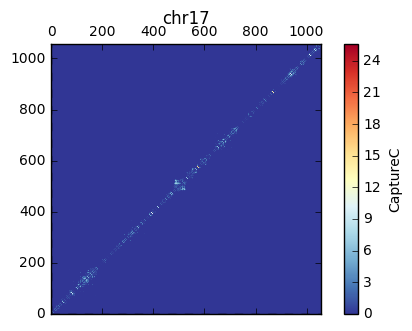

nan
(1057, 1057)
Limit: nan


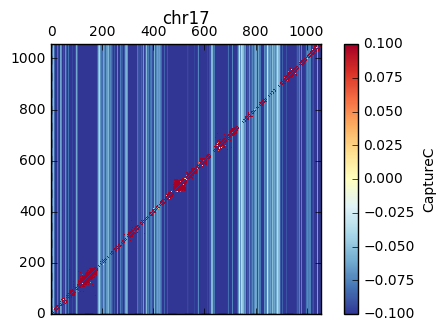

32.4961536185
(1057, 1057)
Limit: 32.4961536185


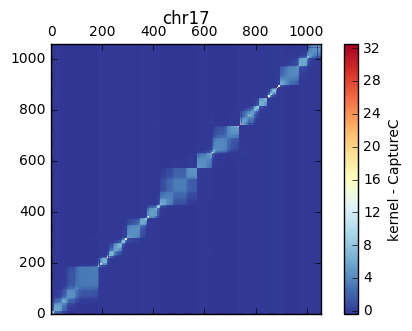

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0287641169752
Average q-value w/o zeros:  1.3922832045


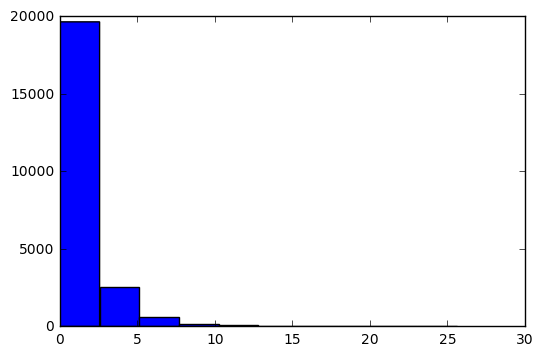

chr18
Training set: 246
Test set: 106
Train by train: (246, 246) Test by test: (106, 106) All by all: (352, 352)
kernel-CaptueC:  (246, 246) (106, 106)
18.3424295608
(352, 352)
Limit: 18.3424295608


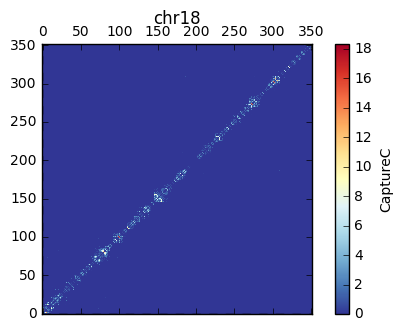

nan
(352, 352)
Limit: nan


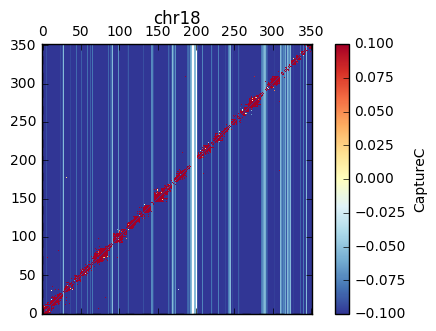

18.7349939952
(352, 352)
Limit: 18.7349939952


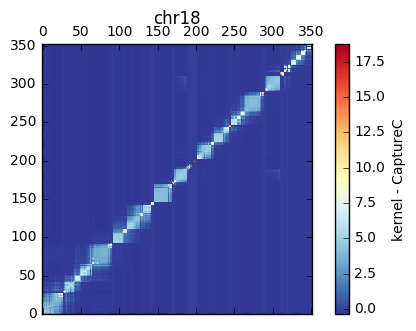

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0339309748724
Average q-value w/o zeros:  1.42611380956


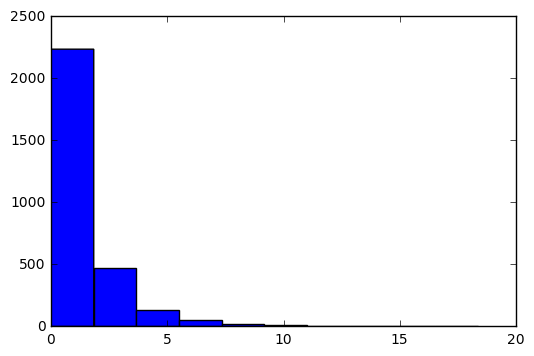

chr19
Training set: 736
Test set: 316
Train by train: (736, 736) Test by test: (316, 316) All by all: (1052, 1052)
kernel-CaptueC:  (736, 736) (316, 316)
28.1896471246
(1052, 1052)
Limit: 28.1896471246


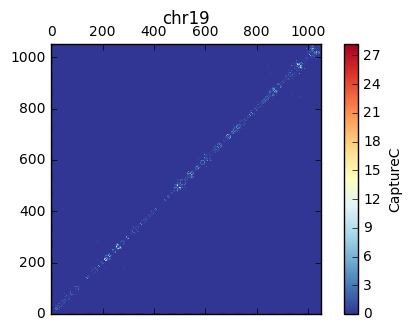

nan
(1052, 1052)
Limit: nan


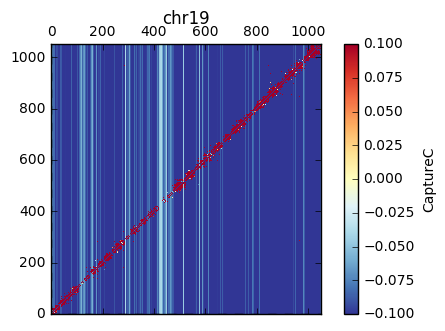

32.4191301549
(1052, 1052)
Limit: 32.4191301549


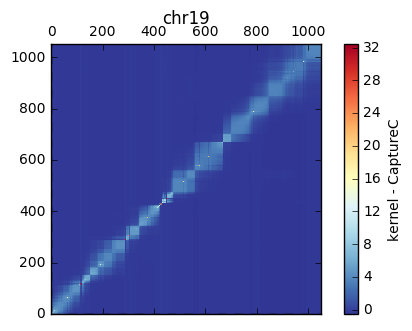

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0294365101139
Average q-value w/o zeros:  1.20612748941


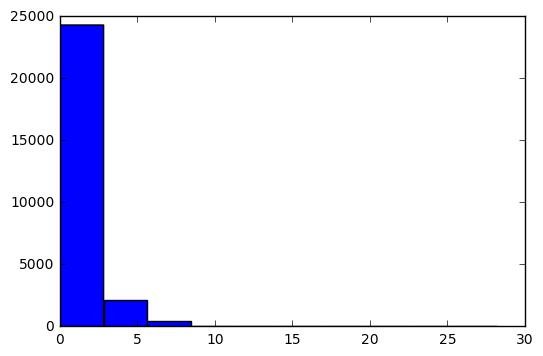

chr20
Training set: 433
Test set: 186
Train by train: (433, 433) Test by test: (186, 186) All by all: (619, 619)
kernel-CaptueC:  (433, 433) (186, 186)
25.7727570819
(619, 619)
Limit: 25.7727570819


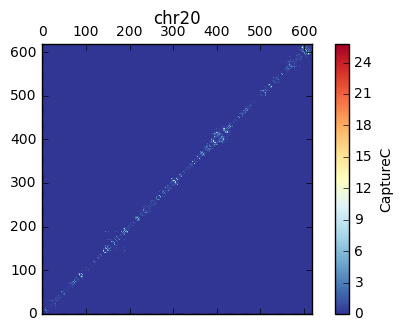

24.8596057893
(619, 619)
Limit: 24.8596057893


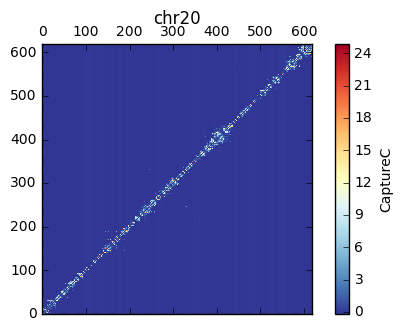

24.4210869748
(619, 619)
Limit: 24.4210869748


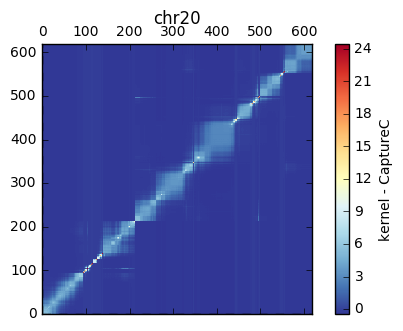

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0301011485445
Average q-value w/o zeros:  1.14625185624


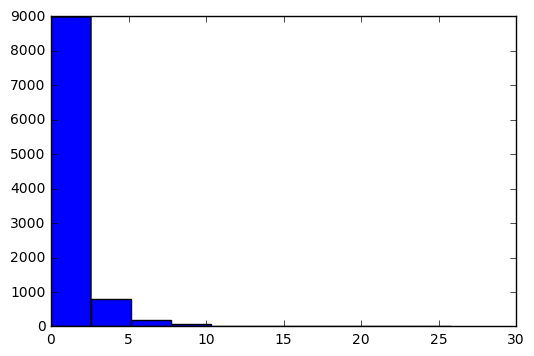

chr21
Training set: 196
Test set: 84
Train by train: (196, 196) Test by test: (84, 84) All by all: (280, 280)
kernel-CaptueC:  (196, 196) (84, 84)
32.7257643484
(280, 280)
Limit: 32.7257643484


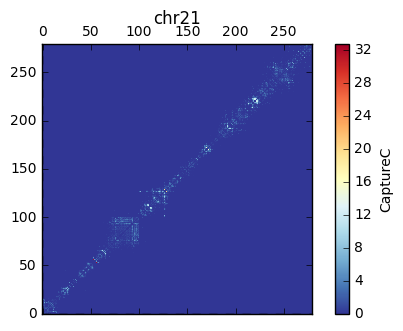

nan
(280, 280)
Limit: nan


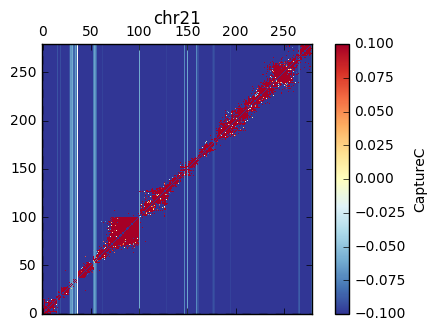

16.7032930885
(280, 280)
Limit: 16.7032930885


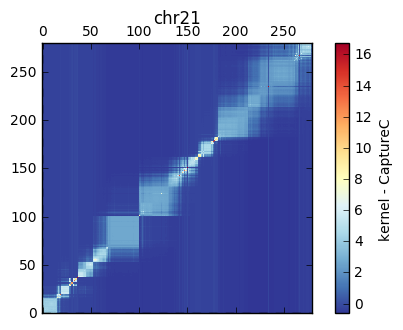

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0558577097649
Average q-value w/o zeros:  1.07334422686


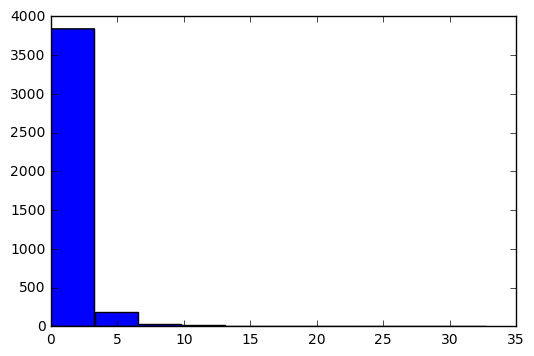

chr22
Training set: 301
Test set: 130
Train by train: (301, 301) Test by test: (130, 130) All by all: (431, 431)
kernel-CaptueC:  (301, 301) (130, 130)
22.3131075709
(431, 431)
Limit: 22.3131075709


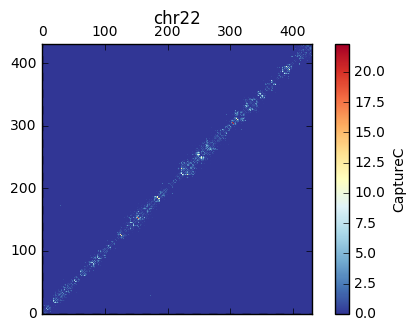

nan
(431, 431)
Limit: nan


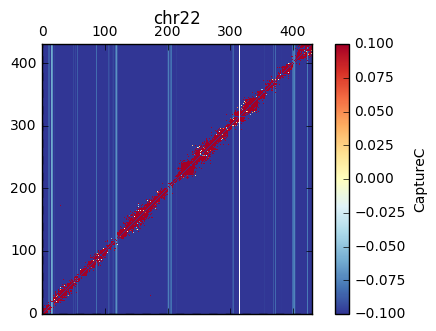

20.7364413533
(431, 431)
Limit: 20.7364413533


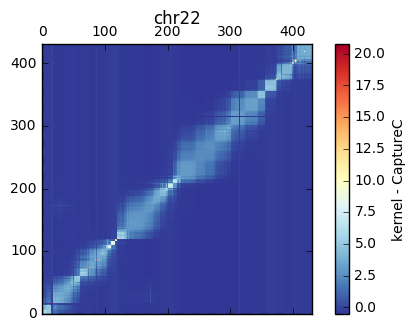

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0425765630181
Average q-value w/o zeros:  1.10771217406


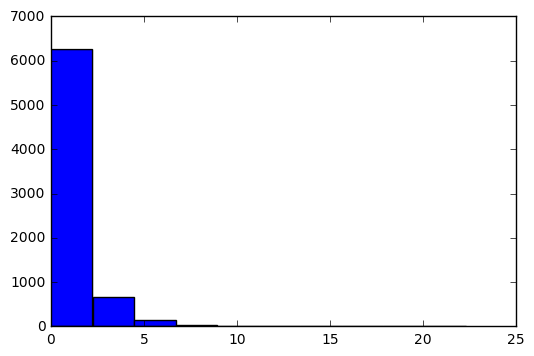

chrX
Training set: 602
Test set: 259
Train by train: (602, 602) Test by test: (259, 259) All by all: (861, 861)
kernel-CaptueC:  (602, 602) (259, 259)
22.8269774368
(861, 861)
Limit: 22.8269774368


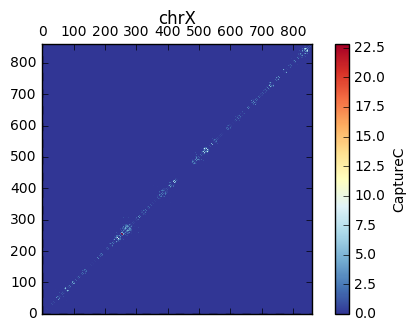

nan
(861, 861)
Limit: nan


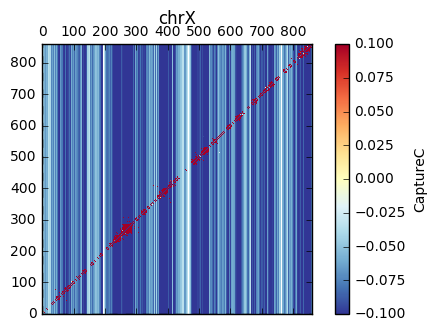

29.3257565972
(861, 861)
Limit: 29.3257565972


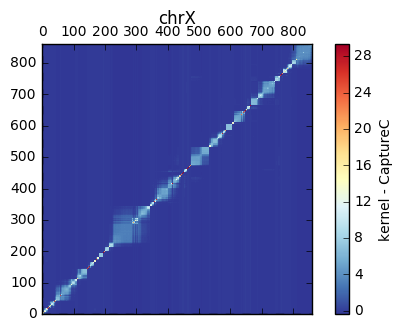

Some tests on adjacency matrix:
Adjacency matrix is symmetric
Average q-value with zeros:  0.0181033657784
Average q-value w/o zeros:  1.30269901205


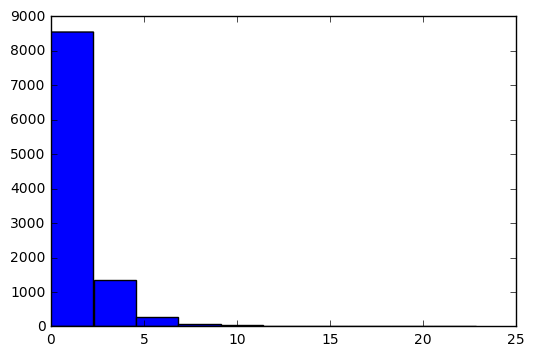

In [ ]:
for chr in all_chrs:
    print chr
    #build CaptureC-2d
    PPMatrixCaptureC = BuildMatrixA(PromoterFile, InteractionsFileCaptureC, 'CaptureC', chr) 
    #get CaptureC train and test data
    train_by_train, test_by_test, train_nodes, test_nodes = train_test_2D(PPMatrixCaptureC, 0.7)
    #make kernel
    cca = rcca.CCA(ktype="diffusion", beta=1.0)
    kernel_CaptureC=cca.kernelize(PPMatrixCaptureC)
    #get train and test data from kernel
    kernel_train_by_train = kernel_CaptureC[train_nodes][:,train_nodes]
    kernel_test_by_test = kernel_CaptureC[test_nodes][:,test_nodes]
    print "kernel-CaptueC: ", kernel_train_by_train.shape, kernel_test_by_test.shape
    #saving CaptureC
    np.save(DATADIR_CaptureC+'CaptureC_'+chr, PPMatrixCaptureC)
    np.save(DATADIR_CaptureC+'train_CaptureC_'+chr, train_by_train)
    np.save(DATADIR_CaptureC+'test_CaptureC_'+chr, test_by_test)
    #saving kernel-CaptureC
    np.save(DATADIR_kernels+'kernel_CaptureC_'+chr, kernel_CaptureC)
    np.save(DATADIR_kernels+'kernel_train_CaptureC_'+chr, kernel_train_by_train)
    np.save(DATADIR_kernels+'kernel_test_CaptureC_'+chr, kernel_test_by_test)
    #saving nodes
    np.save(DATADIR_nodes+'train_nodes_'+chr, train_nodes)
    np.save(DATADIR_nodes+'test_nodes_'+chr, test_nodes)
    #plot CaptureC
    printMatrix(PPMatrixCaptureC, 'CaptureC', 1, 1, chr)
    plot_zscore(PPMatrixCaptureC, 'CaptureC', chr)
    #plot kernel-CaptureC
    plot_zscore(kernel_CaptureC, 'kernel - CaptureC', chr)
    print_q_val_hist(PPMatrixCaptureC)

## Get features for each chr and split it into train/test

In [ ]:
distance_for_node = build_distance_for_node(PromoterFile)
features = [atac, ctcf, pol3, TP63, LSD1, H3K27ac, H3K27me3, H3K4me1, H3K4me3, H3K9ac]
for chr in all_chrs:
    FeatureVector = np.empty((distance_for_node[chr].shape[0],0))
    for feature in features:
        Vector = BuildFeatureVector(PromoterFile, feature, chr)
        FeatureVector = np.concatenate((FeatureVector, Vector), axis=1)
    FeatureVector = np.concatenate((FeatureVector, distance_for_node[chr]), axis=1)
    train_nodes = np.load(DATADIR_nodes+'train_nodes_'+chr+'.npy')
    test_nodes = np.load(DATADIR_nodes+'test_nodes_'+chr+'.npy')
    np.save(DATADIR_features+'features_'+chr, FeatureVector)
    np.save(DATADIR_features+'train_features_'+chr, FeatureVector[train_nodes,:])
    np.save(DATADIR_features+'test_features_'+chr, FeatureVector[test_nodes,:])

# Get CaptureC with ambiguous

non-unique entries in CaptureC file(bait1-bait2/bait2-bait1):  1237741.0   0.49244938606 %
unique entries in CaptureC file(bait1-bait2/bait2-bait1):  1275697.0   0.50755061394 %
9.94467684439
(23, 23)
Limit: 9.94467684439


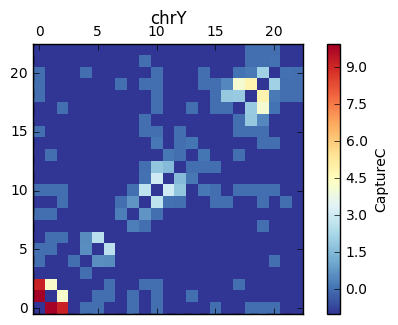

22.8269774368
(861, 861)
Limit: 22.8269774368


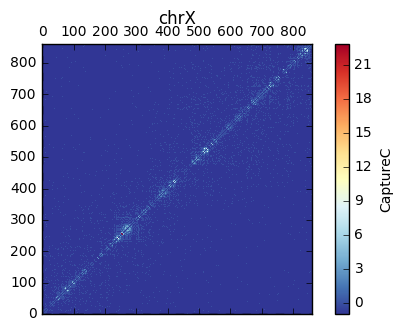

21.5727906396
(452, 452)
Limit: 21.5727906396


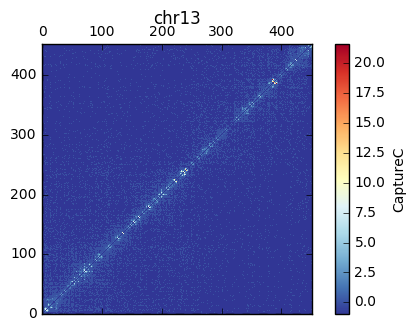

38.279557815
(1200, 1200)
Limit: 38.279557815


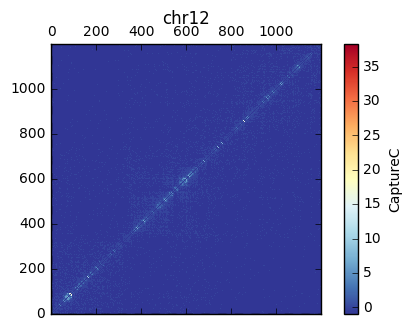

89.248892498
(1401, 1401)
Limit: 89.248892498


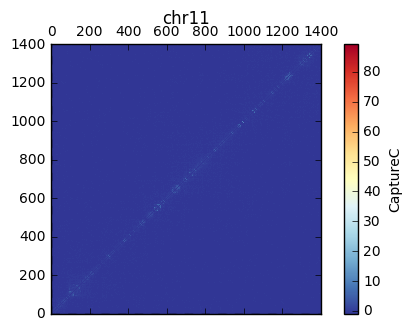

29.8887646521
(943, 943)
Limit: 29.8887646521


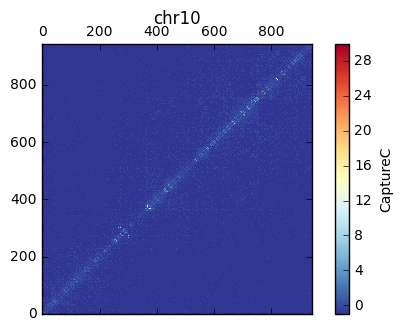

25.5912905912
(1057, 1057)
Limit: 25.5912905912


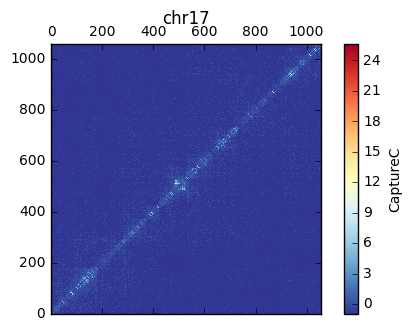

34.411055285
(726, 726)
Limit: 34.411055285


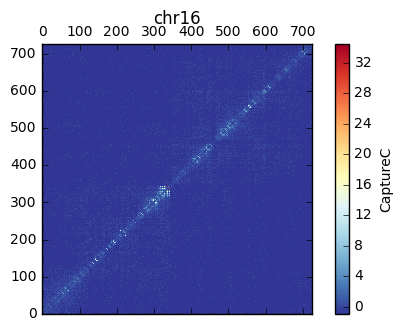

36.7444246202
(629, 629)
Limit: 36.7444246202


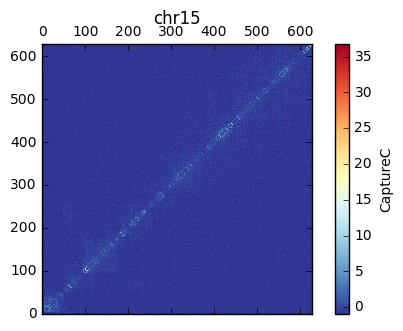

42.0631034651
(779, 779)
Limit: 42.0631034651


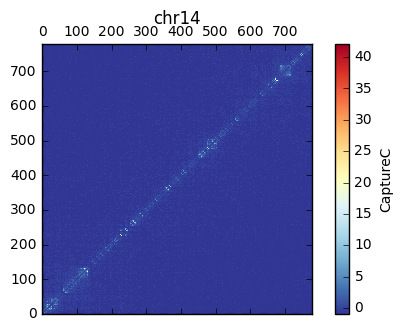

28.1896471246
(1052, 1052)
Limit: 28.1896471246


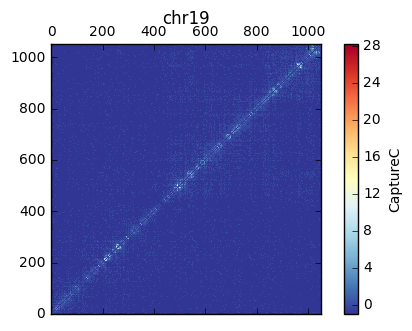

18.3424295608
(352, 352)
Limit: 18.3424295608


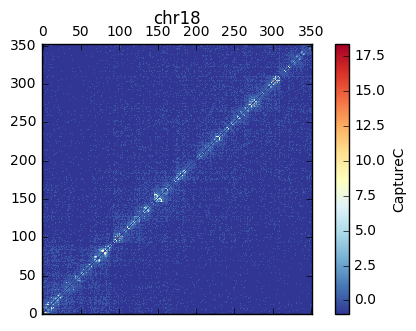

22.3131075709
(431, 431)
Limit: 22.3131075709


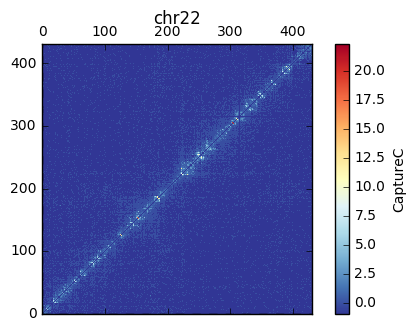

25.7727570819
(619, 619)
Limit: 25.7727570819


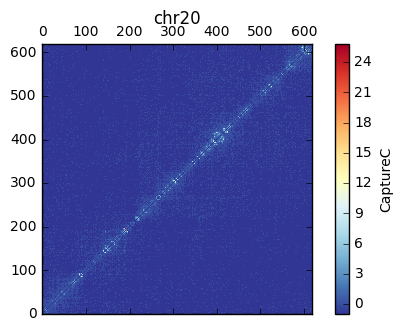

32.7257643484
(280, 280)
Limit: 32.7257643484


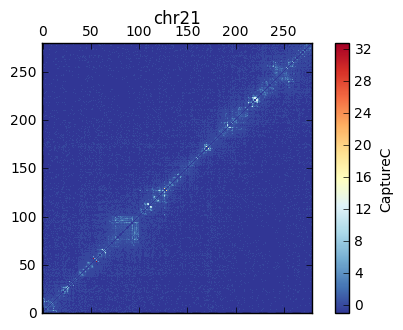

25.5283886209
(1020, 1020)
Limit: 25.5283886209


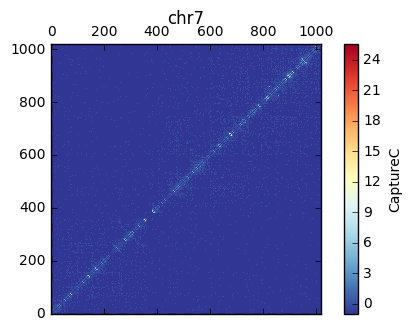

36.0192673345
(1224, 1224)
Limit: 36.0192673345


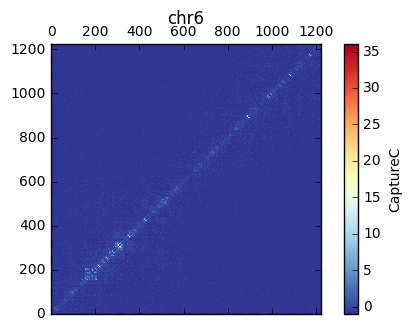

42.7960448953
(1117, 1117)
Limit: 42.7960448953


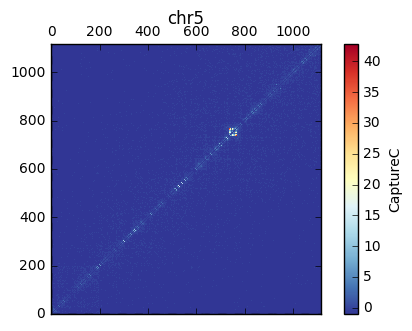

29.1857337384
(947, 947)
Limit: 29.1857337384


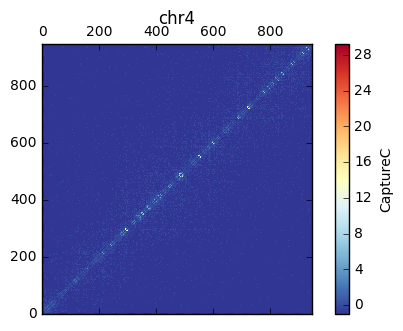

51.8823719279
(1331, 1331)
Limit: 51.8823719279


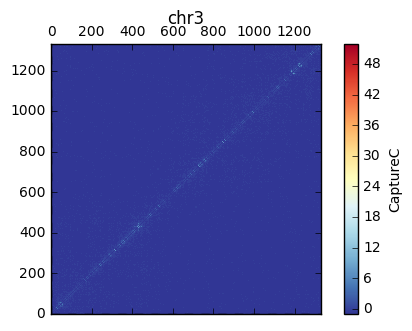

52.2524743922
(1604, 1604)
Limit: 52.2524743922


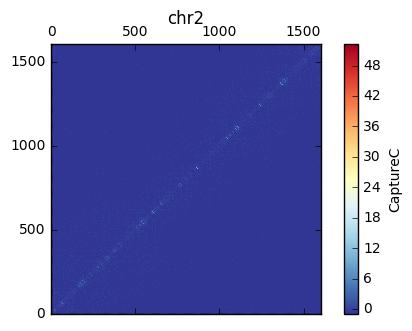

46.6549268544
(2272, 2272)
Limit: 46.6549268544


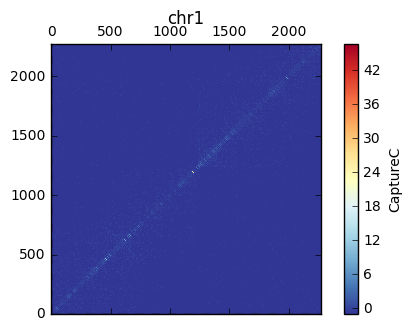

27.5909812515
(859, 859)
Limit: 27.5909812515


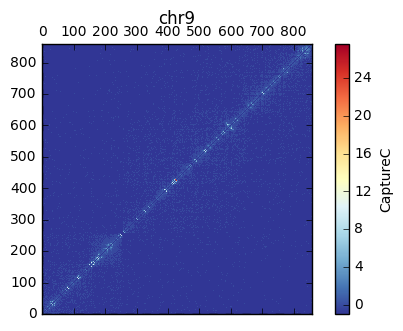

25.6318863979
(897, 897)
Limit: 25.6318863979


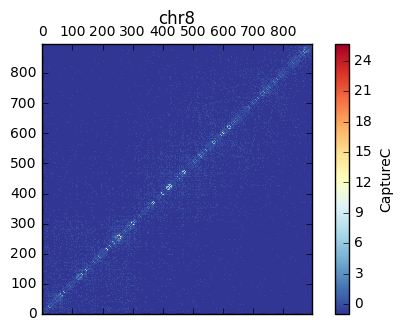

In [15]:
PPMatrixCaptureC_w_ambig = BuildMatrix_w_ambig(PromoterFile, InteractionsFileCaptureC) 
for chr in PPMatrixCaptureC_w_ambig:
    printMatrix(PPMatrixCaptureC_w_ambig[chr], 'CaptureC', 1, 1, chr)
    np.save(DATADIR_CaptureC+'CaptureC_wAmbig_'+chr, PPMatrixCaptureC_w_ambig[chr])